<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/DatosO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url4,usecols=[1])
df2 = pd.read_csv(url4,usecols=[2])
df3 = pd.read_csv(url4,usecols=[3])
df4 = pd.read_csv(url4,usecols=[4])
df5 = pd.read_csv(url4,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
#noreste_dioxido_de_azufre
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 21s - loss: 544.9493
Epoch 2/800
52/52 - 0s - loss: 234.1761
Epoch 3/800
52/52 - 0s - loss: 113.2433
Epoch 4/800
52/52 - 0s - loss: 55.1481
Epoch 5/800
52/52 - 0s - loss: 30.5819
Epoch 6/800
52/52 - 0s - loss: 21.9693
Epoch 7/800
52/52 - 0s - loss: 19.4801
Epoch 8/800
52/52 - 0s - loss: 18.9235
Epoch 9/800
52/52 - 0s - loss: 18.7030
Epoch 10/800
52/52 - 0s - loss: 18.7199
Epoch 11/800
52/52 - 0s - loss: 18.6434
Epoch 12/800
52/52 - 0s - loss: 18.7086
Epoch 13/800
52/52 - 0s - loss: 18.7155
Epoch 14/800
52/52 - 0s - loss: 18.7378
Epoch 15/800
52/52 - 0s - loss: 18.7142
Epoch 16/800
52/52 - 0s - loss: 18.7469
Epoch 17/800
52/52 - 0s - loss: 18.7319
Epoch 18/800
52/52 - 0s - loss: 18.6725
Epoch 19/800
52/52 - 0s - loss: 18.9671
Epoch 20/800
52/52 - 0s - loss: 18.7443
Epoch 21/800
52/52 - 0s - loss: 18.7386
Epoch 22/800
52/52 - 0s - loss: 18.7492
Epoch 23/800
52/52 - 0s - loss: 18.7524
Epoch 24/800
52/52 - 0s - loss: 18.7394
Epoch 25/800
52/52 - 0s - loss: 18.7476
Epoch

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 4.79 MSE (2.19 RMSE)
Resultado del test: 20.46 MSE (4.52 RMSE)


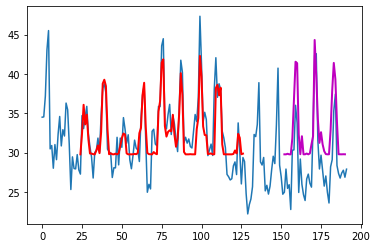

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 924.2197
Epoch 2/800
52/52 - 0s - loss: 513.3187
Epoch 3/800
52/52 - 0s - loss: 316.4643
Epoch 4/800
52/52 - 0s - loss: 188.3298
Epoch 5/800
52/52 - 0s - loss: 111.3775
Epoch 6/800
52/52 - 0s - loss: 70.3050
Epoch 7/800
52/52 - 0s - loss: 49.6591
Epoch 8/800
52/52 - 0s - loss: 39.6028
Epoch 9/800
52/52 - 0s - loss: 34.9959
Epoch 10/800
52/52 - 0s - loss: 33.1915
Epoch 11/800
52/52 - 0s - loss: 32.4192
Epoch 12/800
52/52 - 0s - loss: 32.2562
Epoch 13/800
52/52 - 0s - loss: 32.0339
Epoch 14/800
52/52 - 0s - loss: 32.0360
Epoch 15/800
52/52 - 0s - loss: 32.0585
Epoch 16/800
52/52 - 0s - loss: 31.9923
Epoch 17/800
52/52 - 0s - loss: 31.3805
Epoch 18/800
52/52 - 0s - loss: 31.2085
Epoch 19/800
52/52 - 0s - loss: 31.5337
Epoch 20/800
52/52 - 0s - loss: 31.2381
Epoch 21/800
52/52 - 0s - loss: 30.9736
Epoch 22/800
52/52 - 0s - loss: 30.9219
Epoch 23/800
52/52 - 0s - loss: 30.5572
Epoch 24/800
52/52 - 0s - loss: 30.4887
Epoch 25/800
52/52 - 0s - loss: 30.32

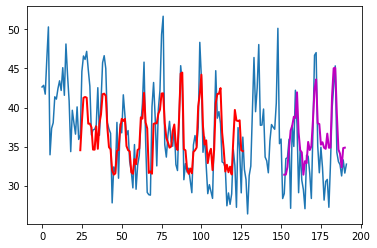

In [10]:
#	suroeste_dioxido_de_azufre
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 540.3900
Epoch 2/800
52/52 - 0s - loss: 245.8230
Epoch 3/800
52/52 - 0s - loss: 136.6652
Epoch 4/800
52/52 - 0s - loss: 74.2216
Epoch 5/800
52/52 - 0s - loss: 41.4762
Epoch 6/800
52/52 - 0s - loss: 26.3015
Epoch 7/800
52/52 - 0s - loss: 19.7045
Epoch 8/800
52/52 - 0s - loss: 17.2275
Epoch 9/800
52/52 - 0s - loss: 16.2978
Epoch 10/800
52/52 - 0s - loss: 16.1257
Epoch 11/800
52/52 - 0s - loss: 15.9600
Epoch 12/800
52/52 - 0s - loss: 15.9503
Epoch 13/800
52/52 - 0s - loss: 15.9331
Epoch 14/800
52/52 - 0s - loss: 16.1410
Epoch 15/800
52/52 - 0s - loss: 16.2439
Epoch 16/800
52/52 - 0s - loss: 15.8788
Epoch 17/800
52/52 - 0s - loss: 15.7467
Epoch 18/800
52/52 - 0s - loss: 15.3475
Epoch 19/800
52/52 - 0s - loss: 15.1170
Epoch 20/800
52/52 - 0s - loss: 15.1416
Epoch 21/800
52/52 - 0s - loss: 14.4540
Epoch 22/800
52/52 - 0s - loss: 14.3230
Epoch 23/800
52/52 - 0s - loss: 14.3167
Epoch 24/800
52/52 - 0s - loss: 13.5661
Epoch 25/800
52/52 - 0s - loss: 13.5551

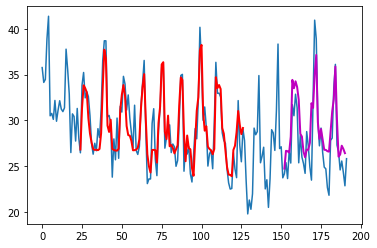

In [11]:
#	noroeste_dioxido_de_azufre
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 683.1378
Epoch 2/800
52/52 - 0s - loss: 318.0141
Epoch 3/800
52/52 - 0s - loss: 166.7165
Epoch 4/800
52/52 - 0s - loss: 86.2973
Epoch 5/800
52/52 - 0s - loss: 48.4279
Epoch 6/800
52/52 - 0s - loss: 31.7376
Epoch 7/800
52/52 - 0s - loss: 25.2566
Epoch 8/800
52/52 - 0s - loss: 22.8480
Epoch 9/800
52/52 - 0s - loss: 22.1506
Epoch 10/800
52/52 - 0s - loss: 21.9647
Epoch 11/800
52/52 - 0s - loss: 21.8976
Epoch 12/800
52/52 - 0s - loss: 21.9058
Epoch 13/800
52/52 - 0s - loss: 21.9030
Epoch 14/800
52/52 - 0s - loss: 22.0083
Epoch 15/800
52/52 - 0s - loss: 21.8864
Epoch 16/800
52/52 - 0s - loss: 21.9646
Epoch 17/800
52/52 - 0s - loss: 21.8920
Epoch 18/800
52/52 - 0s - loss: 21.9822
Epoch 19/800
52/52 - 0s - loss: 21.9301
Epoch 20/800
52/52 - 0s - loss: 21.7826
Epoch 21/800
52/52 - 0s - loss: 21.5864
Epoch 22/800
52/52 - 0s - loss: 21.6318
Epoch 23/800
52/52 - 0s - loss: 21.6119
Epoch 24/800
52/52 - 0s - loss: 21.7777
Epoch 25/800
52/52 - 0s - loss: 21.4189

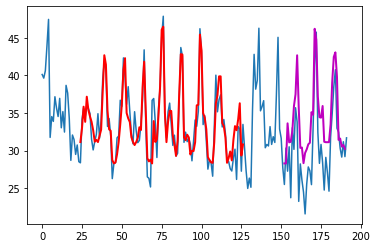

In [12]:
#sureste_dioxido_de_azufre
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 317.4030
Epoch 2/800
52/52 - 0s - loss: 97.2258
Epoch 3/800
52/52 - 0s - loss: 43.4148
Epoch 4/800
52/52 - 0s - loss: 22.9004
Epoch 5/800
52/52 - 0s - loss: 16.9717
Epoch 6/800
52/52 - 0s - loss: 16.0426
Epoch 7/800
52/52 - 0s - loss: 15.9531
Epoch 8/800
52/52 - 0s - loss: 15.6414
Epoch 9/800
52/52 - 0s - loss: 15.5146
Epoch 10/800
52/52 - 0s - loss: 15.3603
Epoch 11/800
52/52 - 0s - loss: 14.9802
Epoch 12/800
52/52 - 0s - loss: 14.4981
Epoch 13/800
52/52 - 0s - loss: 14.0369
Epoch 14/800
52/52 - 0s - loss: 13.5807
Epoch 15/800
52/52 - 0s - loss: 13.8990
Epoch 16/800
52/52 - 0s - loss: 13.7102
Epoch 17/800
52/52 - 0s - loss: 12.8761
Epoch 18/800
52/52 - 0s - loss: 12.6484
Epoch 19/800
52/52 - 0s - loss: 12.2129
Epoch 20/800
52/52 - 0s - loss: 11.9786
Epoch 21/800
52/52 - 0s - loss: 10.8916
Epoch 22/800
52/52 - 0s - loss: 11.3705
Epoch 23/800
52/52 - 0s - loss: 10.7699
Epoch 24/800
52/52 - 0s - loss: 10.4282
Epoch 25/800
52/52 - 0s - loss: 10.1622
E

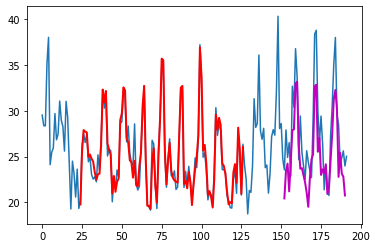

In [13]:
#centro_dioxido_de_azufre
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

In [14]:
df = pd.read_csv(url)

In [15]:
df

,fecha,noreste_monoxido_de_carbono,suroeste_monoxido_de_carbono,noroeste_monoxido_de_carbono,sureste_monoxido_de_carbono,centro_monoxido_de_carbono
0,2005-01-31,17.379032,17.501344,18.849462,22.038978,22.013441
1,2005-02-28,16.300595,14.505952,16.983631,19.949405,19.897321
2,2005-03-31,15.766129,13.456989,17.076613,17.314516,20.239247
3,2005-04-30,14.031944,14.483333,18.434722,18.925000,21.051389
4,2005-05-31,16.165323,14.461022,16.596774,20.306452,19.369624
...,...,...,...,...,...,...
187,2020-08-31,4.515812,3.047297,4.209270,4.165775,4.095277
188,2020-09-30,4.385783,3.289151,4.452357,4.617134,4.198453
189,2020-10-31,5.784629,3.226774,4.613840,4.910398,5.146353
190,2020-11-30,6.545849,3.615487,4.801608,5.517874,5.510429
